<a href="https://colab.research.google.com/github/sanskruti-1234/Deep-Learning/blob/main/Practical_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
NUM_CLASSES = 10
INPUT_SHAPE = (32, 32, 3)
BATCH_SIZE = 64

print("Loading and preparing CIFAR-10 dataset...")
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

y_train = y_train.flatten()
y_test = y_test.flatten()

Loading and preparing CIFAR-10 dataset...
170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 9s 0us/step


In [3]:

y_train = to_categorical(y_train, NUM_CLASSES)
y_test = to_categorical(y_test, NUM_CLASSES)

print(f"Training data shape: {x_train.shape}")
print(f"Test data shape: {x_test.shape}")
print(f"Number of classes: {NUM_CLASSES}")


def create_cnn_model(input_shape, num_classes):
    """
    Defines a simple Convolutional Neural Network (CNN) architecture
    optimized for the smaller CIFAR-10 (32x32) image size.
    """
    model = Sequential([
        Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=input_shape),
        Conv2D(32, (3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.25),

        Conv2D(64, (3, 3), padding='same', activation='relu'),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.25),

        Flatten(),
        Dense(512, activation='relu'),
        Dropout(0.5),

        Dense(num_classes, activation='softmax')
    ])
    return model

model = create_cnn_model(INPUT_SHAPE, NUM_CLASSES)

Training data shape: (50000, 32, 32, 3)
Test data shape: (10000, 32, 32, 3)
Number of classes: 10


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [4]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

print("\nModel Summary:")
model.summary()


Model Summary:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 30, 30, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 15, 15, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 13, 13, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,250,858 (4.77 MB)

 Trainable params: 1,250,858 (4.77 MB)

 Non-trainable params: 0 (0.00 B)

In [5]:
EPOCHS = 10

print("\nStarting model training...")
history = model.fit(x_train, y_train,
                    batch_size=BATCH_SIZE,
                    epochs=EPOCHS,
                    validation_data=(x_test, y_test),
                    shuffle=True)


Starting model training...
Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 216s 272ms/step - accuracy: 0.3233 - loss: 1.8160 - val_accuracy: 0.5524 - val_loss: 1.2547
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 211s 270ms/step - accuracy: 0.5725 - loss: 1.2086 - val_accuracy: 0.6681 - val_loss: 0.9504
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 259s 266ms/step - accuracy: 0.6412 - loss: 1.0118 - val_accuracy: 0.6840 - val_loss: 0.9096
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 264s 269ms/step - accuracy: 0.6893 - loss: 0.8921 - val_accuracy: 0.7169 - val_loss: 0.8212
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 208s 266ms/step - accuracy: 0.7058 - loss: 0.8264 - val_accuracy: 0.7321 - val_loss: 0.7651
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 207s 264ms/step - accuracy: 0.7274 - loss: 0.7683 - val_accuracy: 0.7477 - val_loss: 0.7331
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 207s 265ms/step - accuracy: 0.7502 - loss: 0.7069 - val_accuracy: 0.7616 - val_loss: 0.6887
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 207s 265

In [6]:
print("\nEvaluating model on the test dataset...")
score = model.evaluate(x_test, y_test, verbose=0)
print(f'Test Loss: {score[0]:.4f}')
print(f'Test Accuracy: {score[1]*100:.2f}%')


Evaluating model on the test dataset...
Test Loss: 0.6553
Test Accuracy: 77.80%


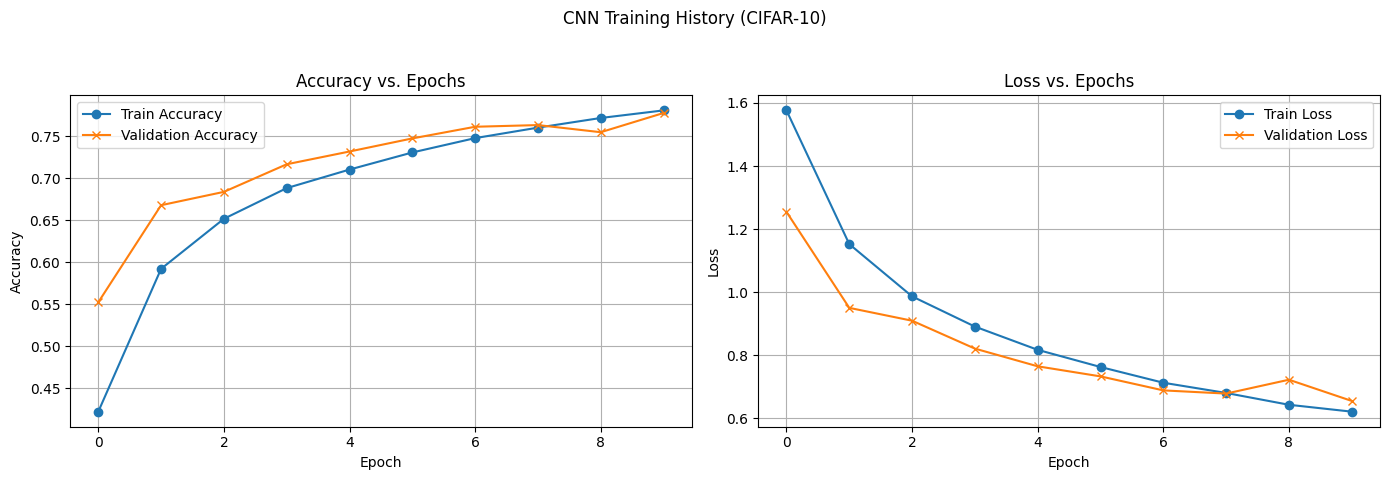

In [7]:
cifar10_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

def plot_history(history):
    """
    Plots the training and validation accuracy and loss over epochs.
    """
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))
    fig.suptitle('CNN Training History (CIFAR-10)')

    ax1.plot(history.history['accuracy'], label='Train Accuracy', marker='o')
    ax1.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='x')
    ax1.set_title('Accuracy vs. Epochs')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Accuracy')
    ax1.legend()
    ax1.grid(True)

    ax2.plot(history.history['loss'], label='Train Loss', marker='o')
    ax2.plot(history.history['val_loss'], label='Validation Loss', marker='x')
    ax2.set_title('Loss vs. Epochs')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Loss')
    ax2.legend()
    ax2.grid(True)

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

plot_history(history)

In [8]:
predictions = model.predict(x_test[:4])
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(y_test[:4], axis=1)

print("\nSample Predictions (First 4 test images):")
for i in range(4):
    print(f"Image {i+1}: True Class: {cifar10_labels[true_classes[i]]}, Predicted Class: {cifar10_labels[predicted_classes[i]]}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step

Sample Predictions (First 4 test images):
Image 1: True Class: cat, Predicted Class: cat
Image 2: True Class: ship, Predicted Class: ship
Image 3: True Class: ship, Predicted Class: ship
Image 4: True Class: airplane, Predicted Class: airplane
